In [1]:
import os
import sys

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Crippen import MolLogP as LogP
from rdkit.Chem.Crippen import MolMR as MR
from rdkit.Chem.QED import qed as QED

sys.path.append(os.path.join(os.environ['CONDA_PREFIX'],'share','RDKit','Contrib'))
from SA_Score.sascorer import calculateScore as SAS
#from rdkit.Chem import RDConfig 
#sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
#from sascorer import calculateScore as SAS

import warnings

## Data

In [2]:
smiles = pd.read_csv('./log_normalized/regression/all/smiles.csv')

## Compute Properties

In [ ]:
warnings.filterwarnings('ignore')

properties = []

for smile in smiles['SMILES']:

    mol = MolFromSmiles(smile)

    logp = LogP(mol)
    mr = MR(mol)
    qed = QED(mol)
    sas = SAS(mol)
    
    properties.append([logp, mr, qed, sas])

properties = pd.DataFrame(properties, columns=['logp', 'mr', 'qed', 'sas'])

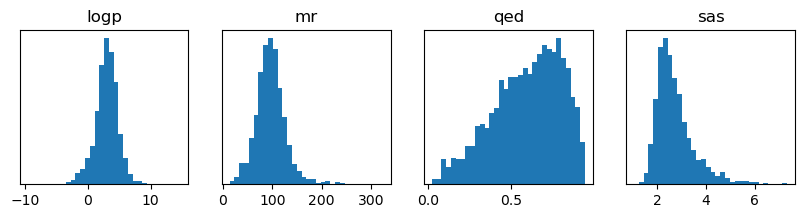

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(10, 2))

for ax, column in zip(axs, properties.columns):
    
    ax.hist(properties[column], bins=32)
    ax.set_title(column)
    ax.set_yticks([])

## Transforms

In [14]:
# Log of skewed data
properties['mr'] = np.log(properties['mr'])
properties.rename(columns={'mr': 'logmr'}, inplace=True)
properties['sas'] = np.log(properties['sas'])
properties.rename(columns={'sas': 'logsas'}, inplace=True)

In [15]:
mu, std = properties.mean(), properties.std()

properties -= mu
properties /= std

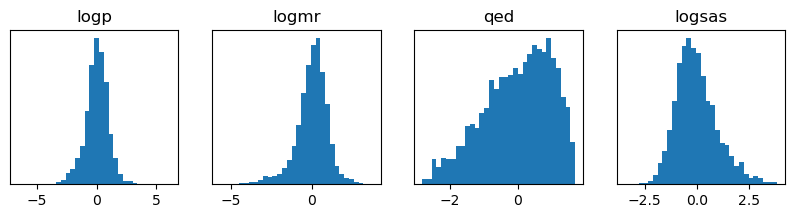

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(10, 2))

for ax, column in zip(axs, properties.columns):
    
    ax.hist(properties[column], bins=32)
    ax.set_title(column)
    ax.set_yticks([])

## Split and Save

In [17]:
# Split sizes
n_train, n_test = properties.shape[0] * 8 // 10, len(properties) // 10

In [18]:
# Split data
train, validation, test = properties.iloc[:n_train], properties.iloc[n_train:n_train+n_test], properties.iloc[n_train+n_test:]

In [19]:
train.to_csv('./log_normalized/regression/train/y_rdkit.csv', index=None)
validation.to_csv('./log_normalized/regression/validation/y_rdkit.csv', index=None)
test.to_csv('./log_normalized/regression/test/y_rdkit.csv', index=None)